### Odds Ratios

The initial step in the logit link function involves the use of **odds ratios**. 

Probabilities and odds ratios represent the same thing in different ways. Probabilities can be alternatively expressed as odds ratios. The odds ratio for probability **p** is defined:

### $$\text{odds ratio}(p) = \frac{p}{1-p}$$

The odds ratio of a probability is a measure of how many times more likely it is than the inverse case.

In [1]:
# Expressed in code

def odds_ratio(p):
    OR = p/(1-p)
    return OR

- When **`p = 0.5`**, the **`odds ratio = 1`** (e.g. coin toss) --> 0.5/1-0.5
    - it is equally likely to happen as it is to not happen.

In [2]:
odds_ratio(0.5)

1.0

- When **`p = 0.75`**, the **`odds ratio = 3`**
    - it is 3 times more likely to happen than not happen.

In [4]:
odds_ratio(0.75)

# 0.75/1-0.75 = 

3.0

- When **`p = 0.40`**, the **`odds ratio = 0.6666666...`**
    - it is 2/3rds as likely to happen than not happen.

In [5]:
odds_ratio(.40)

0.6666666666666667

In [6]:
# for the 5:1 football odds, then 5/6 = 0.8333333
# then use odds_ratio(0.8333333)

`Odd_ratio refresher complete. Let's get to the code along, shall we?`

## Evaluating your Classification Model using the Pima Diabetes dataset

` A bit of feature information from the data dictionary for the Pima Diabetes dataset`

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
**9. Class variable (0 or 1) (1 is interpreted as "tested positive for diabetes")**

> Note:
> 0 = tested negative for diabetes
> 1 = tested positive for diabetes

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
roc_curve, auc, roc_auc_score, precision_score, recall_score

In [8]:
# Load the data from the following url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'

# Create a list of the column names. If you don't pass this list to the names parameter in your 
# pd.read_csv() call, your column names will just be the numbers 0 through 8. 
col_names = ['n_pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'class']
pima = pd.read_csv(url, header=None, names=col_names)

In [9]:
# Quick peek at the first few rows of your dataframe
pima.head(3)

,n_pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [10]:
# Check the datatypes or counts of datatypes in your dataframe.
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
n_pregnant    768 non-null int64
glucose       768 non-null int64
bp            768 non-null int64
skin          768 non-null int64
insulin       768 non-null int64
bmi           768 non-null float64
pedigree      768 non-null float64
age           768 non-null int64
class         768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


`Always be on the lookout for object columns filled with strings. Columns with strings will need to be transformed prior to be run through a scikit model. Remember when Allie transformed the three iris names into numbers before using a kNN instance on that dataset.`

**NEED TO TRANSFORM STRINGS FOR SCIKIT LEARN**

`Additionally, columns with strings can be mighty memory intensive.`


In [18]:
# check types
pima.get_dtype_counts()
# it's great that there's no need to transform strings 

float64    2
int64      7
dtype: int64

In [23]:
# Check the summary statistics of the features/columns in your dataframe
pima.describe().T.style

# T.style makes some integers cleaner (get rid of some of the decimals)

,count,mean,std,min,25%,50%,75%,max
n_pregnant,768,3.84505,3.36958,0,1,3,6,17
glucose,768,120.895,31.9726,0,99,117,140.25,199
bp,768,69.1055,19.3558,0,62,72,80,122
skin,768,20.5365,15.9522,0,0,23,32,99
insulin,768,79.7995,115.244,0,0,30.5,127.25,846
bmi,768,31.9926,7.88416,0,27.3,32,36.6,67.1
pedigree,768,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768,33.2409,11.7602,21,24,29,41,81
class,768,0.348958,0.476951,0,0,0,1,1


In [14]:
# Check your dataframe for missing values
pima.isnull().sum()

n_pregnant    0
glucose       0
bp            0
skin          0
insulin       0
bmi           0
pedigree      0
age           0
class         0
dtype: int64

In [25]:
# Check for the level of balance or imbalance in your target variable data
pima['class'].value_counts()

# If normalize is set to True then the object returned will  contain the relative frequencies of the unique values.
# pima['class'].value_counts(normalize=True)
pima['class'].value_counts(normalize=True).mul(100)

#results are percentage 

0    65.104167
1    34.895833
Name: class, dtype: float64

`Question: What other target variable imbalance does this breakdown remind you of?`

`Answer:` admissions dataset

`So, we've no strings to address and no missing values to address in this dataset.`

`Appears we're ready to model.`

## Scikit - Sklearn - modeling library nirvana. Call it what you will.

### Create your X (features) and y (target)

In [26]:
# Set our features/predictors to X (everything in pima dataset with the exception of the target variable)
X = pima.drop('class', axis=1)
#X = pima.iloc[:, 0:7]

# Set our target variable to y
y = pima['class']
#y=pima.iloc[:, 8]

In [27]:
# Create a train_test_split (tts)

# If test_size is not explicitly set, the split will default to 75% train/25% test
# random_state is set to whatever number pleases you so as to create the same tts each time
# the cell block is run

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
print("X_train shape:{}, y_train shape:{}\n".format(X_train.shape, y_train.shape))
print("X_test shape:{} y_test shape:{}".format(X_test.shape, y_test.shape))

X_train shape:(576, 8), y_train shape:(576,)

X_test shape:(192, 8) y_test shape:(192,)


In [29]:
# Instantiate your model object
lr = LogisticRegression()

# Fit your model with your training data
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### What is your baseline or prevalance?

In [34]:
# Without knowing the baseline, how do you can you assess your accuracy score?

# The baseline gives context to your assessment of the model's accuracy score.
# goal is to beat the prevalance

print("What is the baseline or prevalance in my y_test?", 1 - y_test.mean())

# 'What is the baseline or prevalance in my y_test?', 0.640625 means the % of data points that tested negative (0). 
# this means that the split between test and train actually produced a test set that matches reality (aka the entire data set)


('What is the baseline or prevalance in my y_test?', 0.640625)


In [32]:
# If I wish to spotcheck that baseline number, I can again use .value_counts() with normalize
# set to True. As y_test is a numpy array, we'll also wrap it in pd.Series call so as to use .value_counts()

pd.Series(y_test).value_counts(normalize=True)

0    0.640625
1    0.359375
Name: class, dtype: float64

`How's our model looking so far?`

### Create your predictions

In [36]:
y_pred = lr.predict(X_test)
y_pred[:10]

#result in first ten in the array

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [39]:
# look at more specific probabilities for each class in your target variable (on the sigmoid curve)
# prob of 0 on the left, prob of 1 on the right
# maps to the first 5 in the array
y_proba = lr.predict_proba(X_test)
y_proba[:5]

array([[ 0.66346436,  0.33653564],
       [ 0.77607528,  0.22392472],
       [ 0.8238348 ,  0.1761652 ],
       [ 0.78686249,  0.21313751],
       [ 0.56577735,  0.43422265]])

### Let's explore our probabilities for each class in our target variable in the context of our Pima dataframe

In [40]:
# create new column called predicted class
pima["predicted_class"] = lr.predict(pima[X_train.columns])

pima = pd.concat([pima, pd.DataFrame(lr.predict_proba(pima[X_train.columns]))], axis = 1)

In [42]:
# We'll use this function from pandas styling to highlight 
# the dominant probability for each predicted case in the dataset

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [45]:
# 0 = probability of testing negative for diabetes
# 1 = probability of testing positive for diabetes
#pima.head(10).style.apply(unequal, axis=1, subset=['class', 'predicted_class'])
pima.head(10).style.apply(highlight_max, axis=1, subset=[0, 1])

# see discrepancies between class and predicted_class --> missed row 6,7, and 9

,n_pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class,predicted_class,0,1
0,6,148,72,35,0,33.6,0.627,50,1,1,0.317536,0.682464
1,1,85,66,29,0,26.6,0.351,31,0,0,0.893196,0.106804
2,8,183,64,0,0,23.3,0.672,32,1,1,0.30323,0.69677
3,1,89,66,23,94,28.1,0.167,21,0,0,0.909935,0.0900655
4,0,137,40,35,168,43.1,2.288,33,1,1,0.235484,0.764516
5,5,116,74,0,0,25.6,0.201,30,0,0,0.800612,0.199388
6,3,78,50,32,88,31,0.248,26,1,0,0.862981,0.137019
7,10,115,0,0,0,35.3,0.134,29,0,1,0.317414,0.682586
8,2,197,70,45,543,30.5,0.158,53,1,1,0.228932,0.771068
9,8,125,96,0,0,0,0.232,54,1,0,0.907935,0.092065


In [25]:
#pima[['class', 'predicted_class']].head(10).assign(Not_Equal = pima['class'] != pima.predicted_class)

## Evaluation

`How did our model perform?`

In [44]:
# The accuracy of your classification model
accuracy_score(y_test, y_pred)

0.74479166666666663

`Remember our baseline number of .64? What do you think of the model's performance thus far?`

`Accuracy is a great metric for communicating to others as it's simple to understand. Most everyone has a sense of what accuracy means. But it paints a pretty simple picture of your model's performance. We'll explore other evaluation metrics that can present model performance in a different light.`

### Confusion Matrix

`What types of errors is your classification model making?`

In [46]:
# As this is a binary classification problem, the confusion matrix will be a 2x2 numpy array.
# If this were a multiclass problem the matrix would grow to meet the number
# of options or classes in your target variable.
cm = confusion_matrix(y_test, y_pred); cm

array([[100,  23],
       [ 26,  43]])

`The way to view a confusion matrix:`
$\begin{bmatrix}True Negatives & False Positives\\False Negatives & True Positives\end{bmatrix}$
`or...`
$\begin{bmatrix}TN & FP\\FN & TP\end{bmatrix}$

In [47]:
# (row, column)
TN = cm[0, 0]; print("True Positives:", TN)
TP = cm[1, 1]; print("True Negatives:", TP)
FP = cm[0, 1]; print("False Positives:", FP)
FN = cm[1, 0]; print("False Negatives:", FN)

('True Positives:', 100)
('True Negatives:', 43)
('False Positives:', 23)
('False Negatives:', 26)


`The same as what we saw using the confusion matrix from scikit's metrics module!`

In [52]:
# Calculate the accuracy from earlier by hand
accuracy = (TP + TN)/float(TP + TN + FP + FN)
print(accuracy)


# The formula above should be the same as when we earlier ran the 
# code snippet below
print(accuracy_score(y_test, y_pred))

0.744791666667
0.744791666667


In [53]:
# Calculate your misclassification rate or where your model went astray
misclassification = (FP + FN) / float(TP + TN + FP + FN)
print(misclassification)

# Another way to think of the misclassification rate is (1 - accuracy)
print(1 - accuracy)

0.255208333333
0.255208333333


### Visualizing your confusion matrix

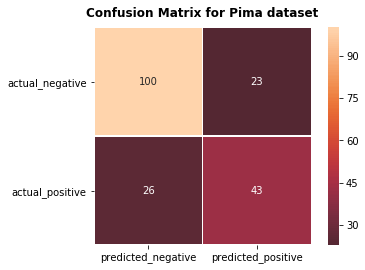

In [50]:
# converting the y_test, y_pred into an array assigned to variable "cm" 
# (short for confusion matrix)
cm = np.array(confusion_matrix(y_test, y_pred))
cm_lr = pd.DataFrame(cm, index=['actual_negative', 'actual_positive'],
                             columns=['predicted_negative',
                                      'predicted_positive']); cm_lr
#Center: The value at which to center the colormap when plotting divergant data.
plt.title('Confusion Matrix for Pima dataset', fontweight='bold', y=1.02)
sns.heatmap(pd.DataFrame(cm_lr), annot=True, square=True, linewidth=0.5, fmt='', center=0)
plt.yticks(rotation=0);

`Seaborn heatmap documentation:`
https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Classification Report

In [51]:
# Here the classification_report from scikit's metrics library displays
# the precision, recall, f1-score, and support (number of instances) for each class.
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.81      0.80       123
          1       0.65      0.62      0.64        69

avg / total       0.74      0.74      0.74       192



`TO REVIEW:`

> **Accuracy** (TP + TN) / Total
- How often is my classifier correct?
- Underlying data/distribution = prevalance or baseline.
- Accuracy must be better than the prevalance or baseline.
- How much better than the baseline does your accuracy need to be depends on what you're measuring.

> **Precision** = TP / TP + FP (TP over all positives)
- When the classifier predicts a positive test for diabetes,
how often is it correct in that prediction?

> **Recall** = TP / TP + FN
- When an individual has diabetes, how often does the classifier
predict a positive test?


> **F1 Score**: Harmonic mean of precision and recall
- F1 Score = (2 x TP)/(2 x TP + FP + FN)<br>
<br>
- $f_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$<br>
<br>
- You're not likely to spend an immense amount of time discussing the F1 score in the wild.

> Key thing to remember: if you increase precision, you'll reduce recall (and vice versa).

A handy reference webpage: http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/lll

### Receiver Operating Characteristic (ROC) Curve

`ROC curve can help you to find a threshold that balances sensitivity and specificity
in a manner that best meets your needs.`


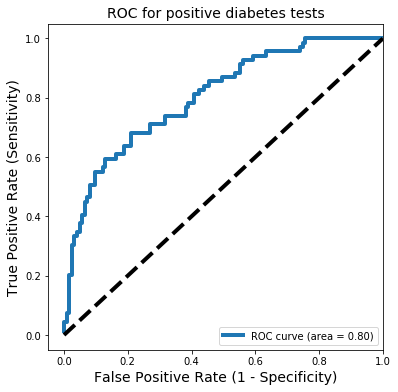

In [54]:
# Find the area under the curve for those who tested positive (class 1)
y_proba_1 = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, y_proba_1)
roc_auc = auc(fpr, tpr)

# Plot the Receiver Operating Characteristic curve for those 
# who tested positive for diabetes
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('ROC for positive diabetes tests', fontsize=14)
plt.legend(loc="lower right")
plt.show()